In [1]:
!pip install opendatasets

In [2]:
!pip install gymnasium==0.28.1
!pip install ipykernel==6.19.2
!pip install matplotlib==3.7.1
!pip install numpy==1.23.1
!pip install pandas==2.0.3
!pip install seaborn==0.12.2
!pip install scikit-learn==1.3.0
!pip install tensorflow==2.10.0
!pip install tensorflow-datasets==1.2.0
!pip install transformers==4.29.2

  Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (787 bytes)
Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigquery-connection 1.15.5 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigtable 2.25.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
go

  Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (679 bytes)
Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.10.0 which is incompatible.


In [3]:
# !pip install nltk

In [78]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/kreeshrajani/3k-conversations-dataset-for-chatbot', force =True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: a
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kreeshrajani/3k-conversations-dataset-for-chatbot


100%|██████████| 67.1k/67.1k [00:00<00:00, 46.9MB/s]

In [5]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os
from tensorflow import keras
import pandas as pd

2024-08-11 13:45:52.908311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-11 13:45:53.335692: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-08-11 13:45:53.335727: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-08-11 13:45:53.380396: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024

In [79]:
df = pd.read_csv('./3k-conversations-dataset-for-chatbot/Conversation.csv')
df.head()

,Unnamed: 0,question,answer
0,0,"hi, how are you doing?",i'm fine. how about yourself?
1,1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,3,no problem. so how have you been?,i've been great. what about you?
4,4,i've been great. what about you?,i've been good. i'm in school right now.


In [80]:
len(df)

3725

In [81]:
df.isna().sum()

,0
Unnamed: 0,0
question,0
answer,0


In [82]:
reviews = df['answer']

# reviews = [review.replace(".","") for review in reviews]

In [10]:
reviews[1]

"And I in going, madam, weep o'er my father's death"

In [84]:
len(reviews)

2235

In [12]:
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [85]:
_,reviews,_,_ = train_test_split(reviews,reviews,test_size=0.5,random_state=42)

In [86]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
input_seq = [tokenizer.encode(s, add_special_tokens = True) for s in reviews]
seq_len = [len(tokenizer.encode(s, add_special_tokens = True)) for s in reviews]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [133]:
x = [seq[:-1] for seq in input_seq]
y = [seq[1:] for seq in input_seq]

x = pad_sequences(x, 24, padding='post', truncating='post')
y = pad_sequences(y, 24, padding='post', truncating='post')

/usr/local/lib/python3.10/dist-packages/keras/utils/data_utils.py:1045: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sample_shape = np.asarray(x).shape[1:]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (24,) + inhomogeneous part.

In [88]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y,test_size=0.2,random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [89]:
from tensorflow.keras.layers import Dense, Input, Embedding, Dropout, LayerNormalization

In [68]:
def scaled_dpa(query, key, value, mask):
  mat_qk = tf.matmul(query, key, transpose_b=True)
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  sal = mat_qk/tf.math.sqrt(depth)

  if mask is not None:
    sal += (mask*-1e9)

  aw = tf.nn.softmax(sal, axis = -1)
  output = tf.matmul(aw, value)
  return output, aw

In [58]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.d_model = d_model
    self.num_heads = num_heads

    assert d_model % num_heads == 0

    self.depth = d_model // num_heads
    self.wq = Dense(d_model)
    self.wk = Dense(d_model)
    self.wv = Dense(d_model)

    self.dense = Dense(d_model)

  def split_heads(self, x, batch_size):
    x = tf.reshape(x, (batch_size,-1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0,2,1,3])

  def get_config(self):
    config = super().get_config()
    config.update({
        'd_model': self.d_model,
        'num_heads': self.num_heads
    })
    return config

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)
    k = self.wk(k)
    v = self.wq(v)

    q = self.split_heads(q, batch_size)
    k = self.split_heads(k, batch_size)
    v = self.split_heads(v, batch_size)

    sa, aw = scaled_dpa(q, k, v, mask)
    sa = tf.transpose(sa, perm=[0,2,1,3])
    ca = tf.reshape(sa, (batch_size,-1, self.d_model))

    output = self.dense(ca)
    return output, aw



In [59]:
def forward_network(d_model, dff):
  return tf.keras.Sequential([
      Dense(dff, activation='relu'),
      Dense(d_model)
  ])

def positional_encoding(pos, d_model):
  angle_rads = 1/np.power(10000, (np.arange(d_model)[np.newaxis, : ] // 2) / np.float32(d_model))
  angle_rads[:,0::2] = np.sin(pos* angle_rads[:,0::2])
  angle_rads[:,1::2] = np.cos(pos* angle_rads[:,1::2])
  pos_encoding = angle_rads[np.newaxis, ...]
  return tf.cast(pos_encoding, tf.float32)

In [90]:
# NUM_HEADS = 8
# D_MODEL = 128
# DFF = 512
# NUM_LAYER = 2

# MAX_POS_ENC = 25
# DROPOUT = 0.5

EPOCH = 23
BATCH_SIZE = 8
INPUT_VOC_SIZE = len(tokenizer.vocab)
D_MODEL = 128
MAX_POS_ENC = 25
DROPOUT = 0.5
NUM_LAYER = 2
NUM_HEADS = 8
DFF = 512

In [91]:
inputs = Input(shape=(24,), name='input')
x = Embedding(INPUT_VOC_SIZE, D_MODEL)(inputs)
x *= tf.math.sqrt(tf.cast(D_MODEL, tf.float32))
x += positional_encoding(MAX_POS_ENC, D_MODEL)
x = Dropout(DROPOUT)(x)

for _ in range(NUM_LAYER):
  att_out, _ = MultiHeadAttention(D_MODEL,NUM_HEADS)(x,x,x,mask=None)
  x = LayerNormalization(epsilon=1e-6)(x + att_out)
  ffn_out = forward_network(D_MODEL, DFF) (x)
  x = LayerNormalization(epsilon=1e-6)(x + ffn_out)

x = Dropout(DROPOUT)(x)

outputs = Dense(INPUT_VOC_SIZE, activation='softmax')(x)

transformers = tf.keras.Model(inputs=inputs, outputs = [outputs])
transformers.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
print(transformers.summary())

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 24)]         0           []                               
                                                                                                  
 embedding_5 (Embedding)        (None, 24, 128)      3711488     ['input[0][0]']                  
                                                                                                  
 tf.math.multiply_5 (TFOpLambda  (None, 24, 128)     0           ['embedding_5[0][0]']            
 )                                                                                                
                                                                                                  
 tf.__operators__.add_25 (TFOpL  (None, 24, 128)     0           ['tf.math.multiply_5[0][0]'

In [92]:
history = transformers.fit(
    x_train,
    np.expand_dims(y_train, -1),
    epochs = EPOCH,
    batch_size = BATCH_SIZE,
    validation_data = (x_valid,np.expand_dims(y_valid, -1)),
    # callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]
)

Epoch 1/23
112/112 [==============================] - 44s 335ms/step - loss: 4.2999 - accuracy: 0.5817 - val_loss: 2.7289 - val_accuracy: 0.5781
Epoch 2/23
112/112 [==============================] - 35s 313ms/step - loss: 2.3443 - accuracy: 0.6323 - val_loss: 2.3331 - val_accuracy: 0.6551
Epoch 3/23
112/112 [==============================] - 38s 338ms/step - loss: 2.1104 - accuracy: 0.6657 - val_loss: 2.2227 - val_accuracy: 0.6674
Epoch 4/23
112/112 [==============================] - 37s 326ms/step - loss: 1.9783 - accuracy: 0.6785 - val_loss: 2.1496 - val_accuracy: 0.6719
Epoch 5/23
112/112 [==============================] - 36s 322ms/step - loss: 1.8683 - accuracy: 0.6895 - val_loss: 2.0713 - val_accuracy: 0.6860
Epoch 6/23
112/112 [==============================] - 36s 324ms/step - loss: 1.7731 - accuracy: 0.7017 - val_loss: 2.0228 - val_accuracy: 0.6968
Epoch 7/23
112/112 [==============================] - 35s 314ms/step - loss: 1.6879 - accuracy: 0.7128 - val_loss: 1.9573 - val_ac

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

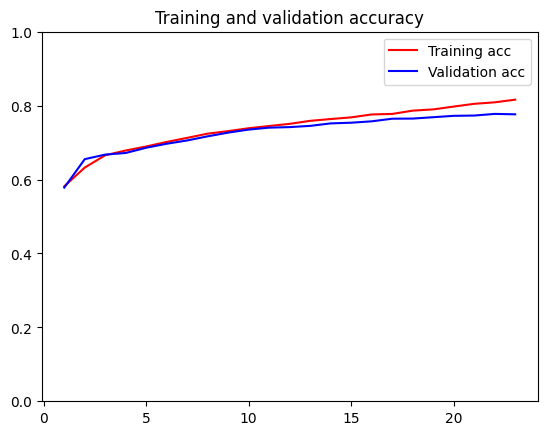

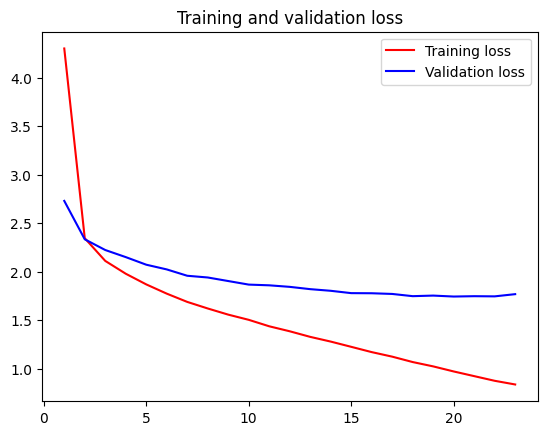

In [94]:

epochs = range(1, len(acc) + 1)
plt.ylim([0,1])
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# plt.ylim([0,5])
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [74]:
predictions = transformers.predict(x_test)
y_pred = tf.argmax(predictions, axis=1)
y_true = tf.argmax(y_test, axis = 1)

6/6 [==============================] - 2s 250ms/step


In [95]:
loss, acc = transformers.evaluate(x_test, np.expand_dims(y_test, -1))
# print(f"test loss : {loss}")
# print(f"test acc  : {acc}")

4/4 [==============================] - 3s 519ms/step - loss: 1.6441 - accuracy: 0.7943


In [175]:
def predict(tokenizer, text):
  en = tokenizer.encode(text, add_special_tokens = True)
  padd_inp = pad_sequences([en], 24, padding='post', truncating='post')
  pred = transformers.predict(padd_inp)
  last = pred[0,1,:]
  predicted = np.argmax(last)

  return tokenizer.decode(predicted)


In [179]:
max = 0
for i,review in enumerate(reviews):
  # if len(review) < 80:
  #   continue
  if i > 20:
    break
  words = review.split(' ')
  # words.pop(len(words) - 1)
  sentence = ''
  for word in words[:-1]:
    sentence += word + ' '
  predict_token = predict(tokenizer, sentence)
  print(f"{sentence}{predict_token}\n")



1/1 [==============================] - 0s 53ms/step
they're very '

1/1 [==============================] - 0s 59ms/step
what h a p p e n e d

1/1 [==============================] - 0s 58ms/step
is it raining right i t

1/1 [==============================] - 0s 74ms/step
i'll vote for him next time, '

1/1 [==============================] - 0s 127ms/step
what's a little '

1/1 [==============================] - 0s 122ms/step
i thought they were playing under a t h o u g h t

1/1 [==============================] - 0s 92ms/step
it sure s u r e

1/1 [==============================] - 0s 120ms/step
neither can c a n

1/1 [==============================] - 0s 101ms/step
that sounds like s o u n d s

1/1 [==============================] - 0s 152ms/step
that's true. it is a very funny '

1/1 [==============================] - 0s 136ms/step
a great burger and great g r e a t

1/1 [==============================] - 0s 101ms/step
if you pour water into a glass, the water goes down into the y o u


In [166]:
sent = 'no, the car has been stopped '
token = predict(tokenizer, sent)
print(token)

1/1 [==============================] - 0s 56ms/step
,


In [128]:
transformers.save('./model.h5')